# Package loading and basic configurations

In [11]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import geopandas as gpd
from envirocar import TrackAPI, DownloadClient, BboxSelector, TimeSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [5]:
bbox = BboxSelector([
    7.401165771484375, # min_x  
    51.94807412325402, # min_y 
    7.648200988769531, # max_x 
    52.97261482608728  # max_y
])

time_interval = TimeSelector(
   '2020-01-01T12:00:00Z', #start time
   '2020-04-10T12:00:00Z'  #end time
)


# issue a query
track_df = track_api.get_tracks(bbox=bbox,  num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Calculated MAF.value,Calculated MAF.unit,Intake Pressure.value,Intake Pressure.unit,CO2.value,CO2.unit,Intake Temperature.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,MAF.value,MAF.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit
0,5eb7582c65b80c5d6be6b013,2020-05-09T23:45:27,POINT (7.61924 51.97461),10.745416,g/s,53.000002,kPa,8.300800,kg/h,27.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eb7582c65b80c5d6be6b015,2020-05-09T23:45:32,POINT (7.61820 51.97455),14.033751,g/s,70.000000,kPa,10.841030,kg/h,26.999999,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eb7582c65b80c5d6be6b016,2020-05-09T23:45:37,POINT (7.61713 51.97449),15.175984,g/s,71.000002,kPa,11.723401,kg/h,26.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eb7582c65b80c5d6be6b017,2020-05-09T23:45:42,POINT (7.61598 51.97444),15.874530,g/s,70.613516,kPa,12.263026,kg/h,25.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eb7582c65b80c5d6be6b018,2020-05-09T23:45:47,POINT (7.61482 51.97439),5.565244,g/s,25.223188,kPa,4.299134,kg/h,24.999999,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,5dda4b8144ea856b70e668b7,2019-11-22T15:32:29,POINT (7.59431 51.96514),13.788344,g/s,69.318181,kPa,10.651454,kg/h,11.000000,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,5dda4b8144ea856b70e668b8,2019-11-22T15:32:35,POINT (7.59347 51.96519),9.628670,g/s,43.735695,kPa,7.438118,kg/h,11.000000,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,5dda4b8144ea856b70e668b9,2019-11-22T15:32:40,POINT (7.59260 51.96524),5.838498,g/s,27.999999,kPa,4.510222,kg/h,11.396875,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,5dda4b8144ea856b70e668ba,2019-11-22T15:32:45,POINT (7.59178 51.96530),8.936570,g/s,42.938620,kPa,6.903473,kg/h,11.000000,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


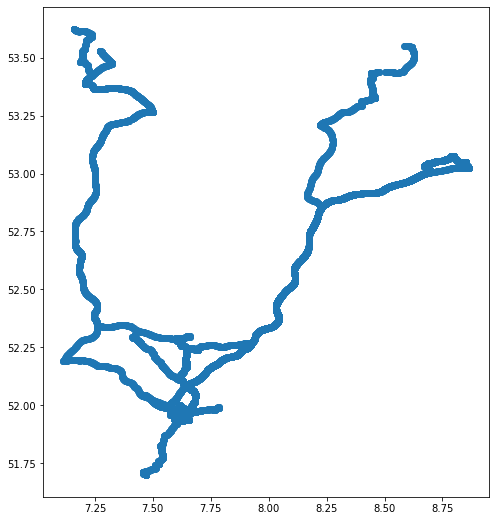

In [6]:
track_df.plot(figsize=(8, 10))

# Summary Statistics

In [26]:
track_df.to_file(r"E:\Munster\Floating Car\Dataset\test1.shp")

In [6]:
track_df.describe()

,GPS Altitude.value,GPS Bearing.value,Throttle Position.value,Speed.value,GPS PDOP.value,Intake Temperature.value,GPS VDOP.value,GPS Speed.value,Intake Pressure.value,Calculated MAF.value,...,Rpm.value,GPS HDOP.value,GPS Accuracy.value,Engine Load.value,track.length,sensor.engineDisplacement,sensor.constructionYear,O2 Lambda Voltage.value,MAF.value,O2 Lambda Voltage ER.value
count,6523.000000,6452.000000,6315.000000,6515.000000,5982.000000,6315.000000,5982.000000,6523.000000,6315.000000,5774.000000,...,6515.000000,5982.000000,6523.000000,6515.000000,6523.000000,6523.000000,6523.000000,541.000000,541.000000,541.000000
mean,93.180508,123.189134,27.952448,80.351567,1.081527,14.001681,0.862268,81.117311,67.294607,24.010089,...,2266.360545,0.576855,2.598519,47.496277,125.023896,1789.484133,2008.308600,0.625895,33.161528,1.726023
std,25.130818,116.901299,19.700183,46.088699,0.407447,7.533296,0.343370,46.843555,31.514601,15.720896,...,1003.862743,0.251786,1.686899,25.504285,65.292326,130.743278,3.602186,0.375124,24.867311,0.332172
min,30.999999,0.000000,10.000000,0.000000,0.800000,4.000000,0.600000,0.000000,16.000000,-3.318304,...,-183.913050,0.400000,1.000000,-495.792866,1.050231,1390.000000,2000.000000,0.000000,2.186086,0.995972
25%,78.000000,26.387683,16.293822,44.000001,0.800000,8.000000,0.700000,44.355774,46.000000,9.379850,...,1473.179210,0.400000,1.500000,31.372549,40.596653,1798.000000,2007.000000,0.380101,18.149487,1.515870
50%,96.000001,66.281323,21.999999,81.327734,1.000000,13.000000,0.800000,82.243995,65.540299,21.783689,...,2077.999938,0.600000,2.000000,48.466102,161.712887,1798.000000,2007.000000,0.559525,23.751428,1.866114
75%,104.999997,216.372268,27.112048,122.000002,1.200000,18.000000,0.988606,124.070902,80.480364,35.780288,...,3228.815145,0.600000,3.216000,64.252143,169.237435,1798.000000,2007.000000,0.908544,41.864931,1.999969
max,195.999997,359.892290,89.000003,373.333340,9.975758,35.000001,8.578788,174.567824,255.000000,72.078894,...,4530.827519,4.788889,29.500000,100.000003,171.928734,1999.000000,2019.000000,1.270696,240.804784,1.999970


# Inspecting a single Track

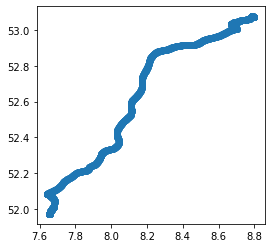

In [7]:
some_track_id = track_df['track.id'].unique()[3]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

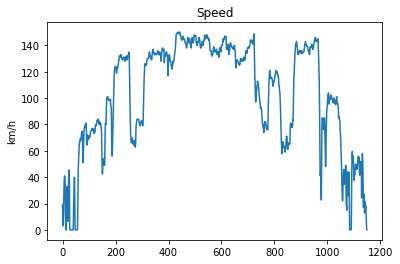

In [8]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

In [1]:

import datetime
import qgis.core
realistc_drive = track_df[['id','time','geometry','Speed.value', 'track.id', 'track.length', 'track.begin', 'track.end', 'sensor.fuelType']]

realistc_drive['new_time'] = QDateTime(realistc_drive['time'])


ModuleNotFoundError: No module named 'qgis'

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [9]:
import folium


lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [10]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=12,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state , mapbox_key='pk.eyJ1IjoibWFzYXdkYWgiLCJhIjoiY2s4dWc4d3dmMDYwMzNkdDgydXVkbWhtayJ9.04ebDR9Rh9N8-TTyAUSzdA'
)
r.to_html('tracks_muenster.html', iframe_width=900)

'C:\\Users\\a\\envirocar-py\\examples\\tracks_muenster.html'

# Visualisation for single track

In [11]:
import pydeck as pdk

single_track_id = track_df['track.id'].unique()[4]
single_track = track_df[track_df['track.id'] == single_track_id]


# for pydeck the attributes have to be flat
single_track['lat'] = single_track['geometry'].apply(lambda coord: coord.y)
single_track['lng'] = single_track['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(single_track)
vis_df['speed'] = vis_df['Speed.value']


# for central location of the track

lats = list(single_track['geometry'].apply(lambda coord: coord.y))
lngs = list(single_track['geometry'].apply(lambda coord: coord.x))
avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)


# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=avg_lngs,
    latitude=avg_lat,
    zoom=12,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state , mapbox_key= 'pk.eyJ1IjoibWFzYXdkYWgiLCJhIjoiY2s4dWc4d3dmMDYwMzNkdDgydXVkbWhtayJ9.04ebDR9Rh9N8-TTyAUSzdA'
    
)
r.to_html('single_tracks_muenster.html', iframe_width=900)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


'C:\\Users\\a\\envirocar-py\\examples\\single_tracks_muenster.html'

In [12]:
import os
os.environ['PATH'].split(';')

['C:\\Users\\a\\Anaconda3\\lib\\site-packages\\shapely\\DLLs',
 'C:\\Users\\a\\Anaconda3\\DLLs',
 'C:\\Users\\a\\Anaconda3',
 'C:\\Users\\a\\Anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\a\\Anaconda3\\Library\\usr\\bin',
 'C:\\Users\\a\\Anaconda3\\Library\\bin',
 'C:\\Users\\a\\Anaconda3\\Scripts',
 'C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath',
 'C:\\WINDOWS\\system32',
 'C:\\WINDOWS',
 'C:\\WINDOWS\\System32\\Wbem',
 'C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\',
 'C:\\WINDOWS\\System32\\OpenSSH\\',
 'C:\\Program Files (x86)\\MATLAB\\MATLAB Compiler Runtime\\v78\\runtime\\win32',
 'C:\\Program Files\\QGIS 3.10\\bin',
 'C:\\Program Files\\Git\\cmd',
 'C:\\Users\\a\\AppData\\Local\\Programs\\MiKTeX 2.9\\miktex\\bin\\x64',
 'C:\\Users\\a\\AppData\\Local\\Microsoft\\WindowsApps',
 '',
 'C:\\Program Files\\snap\\bin',
 'C:\\Users\\a\\AppData\\Local\\Programs\\Microsoft VS Code\\bin',
 'C:\\Users\\a\\Anaconda3\\lib\\site-packages\\fiona\\.libs']

In [1]:
import os
os.environ['PATH'].split(';')

['C:\\Users\\a\\Anaconda3',
 'C:\\Users\\a\\Anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\a\\Anaconda3\\Library\\usr\\bin',
 'C:\\Users\\a\\Anaconda3\\Library\\bin',
 'C:\\Users\\a\\Anaconda3\\Scripts',
 'C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath',
 'C:\\WINDOWS\\system32',
 'C:\\WINDOWS',
 'C:\\WINDOWS\\System32\\Wbem',
 'C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\',
 'C:\\WINDOWS\\System32\\OpenSSH\\',
 'C:\\Program Files (x86)\\MATLAB\\MATLAB Compiler Runtime\\v78\\runtime\\win32',
 'C:\\Program Files\\QGIS 3.10\\bin',
 'C:\\Program Files\\Git\\cmd',
 'C:\\Users\\a\\AppData\\Local\\Programs\\MiKTeX 2.9',
 'C:\\Users\\a\\AppData\\Local\\Microsoft\\WindowsApps',
 '',
 'C:\\Program Files\\snap\\bin',
 'C:\\Users\\a\\AppData\\Local\\Programs\\Microsoft VS Code\\bin']